### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임


In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
y_target = boston_df.PRICE
X_data = boston_df.drop(['PRICE'],axis=1)
rf = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs=-1)
neg_mse_scores = cross_val_score(rf,X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'개별 nms: {np.round(neg_mse_scores,2)}')
print(f'개별 rmse: {np.round(rmse_scores,2)}')
print(f'평균 rmse: {avg_rmse:.2f}')

개별 nms: [ -7.88 -13.14 -20.57 -46.23 -18.88]
개별 rmse: [2.81 3.63 4.54 6.8  4.34]
평균 rmse: 4.42


In [22]:
# Q. 교차검증 사용자 함수 작성학 XGBRegressor 객체를 사용하여 회귀트리 모델링 및 평가를 수행하세요.
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def model_cv_score(model,X_data = None, y_target = None, scoring = None, cv = None):
    neg_mse_scores = cross_val_score(model,X_data, y_target, scoring=scoring, cv=cv)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'model: {model}')
    print(f'개별 nms: {np.round(neg_mse_scores,2)}')
    print(f'개별 rmse: {np.round(rmse_scores,2)}')
    print(f'평균 rmse: {avg_rmse:.2f}')
    print('\n')

cv = KFold(5, shuffle=True, random_state=0)

Dt = DecisionTreeRegressor(random_state=0,max_depth=4)
Lgb = LGBMRegressor(n_estimators=1000,learning_rate=0.1,n_jobs=-1)
Xgb = XGBRegressor(n_estimators=1000,learning_rate=0.1,n_jobs=-1)

model_cv_score(Dt,X_data,y_target,'neg_mean_squared_error',cv=cv)
model_cv_score(Xgb,X_data,y_target,'neg_mean_squared_error',cv=cv)
model_cv_score(Lgb,X_data,y_target,'neg_mean_squared_error',cv=cv)

model: DecisionTreeRegressor(max_depth=4, random_state=0)
개별 nms: [-35.88 -14.53 -20.2  -48.94 -13.51]
개별 rmse: [5.99 3.81 4.49 7.   3.68]
평균 rmse: 4.99


model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
개별 nms: [-21.68  -5.89 -10.77 -19.78  -8.91]
개별 rmse: [4.66 2.43 3.28 4.45 2.99]
평균 rmse: 3.56


model: LGBMRegressor(n_estimators=1000)
개별 nms: [-24.94  -7.03 -15.

<AxesSubplot:>

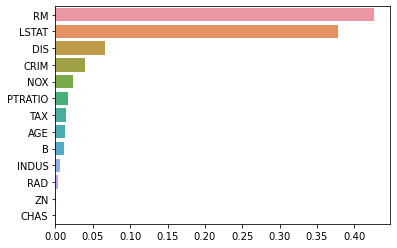

In [23]:
import seaborn as sns

rf = RandomForestRegressor(random_state=0,n_estimators=1000,n_jobs=-1)
rf.fit(X_data,y_target)

feature_series = pd.Series(data=rf.feature_importances_,index=X_data.columns).sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

(100, 2)


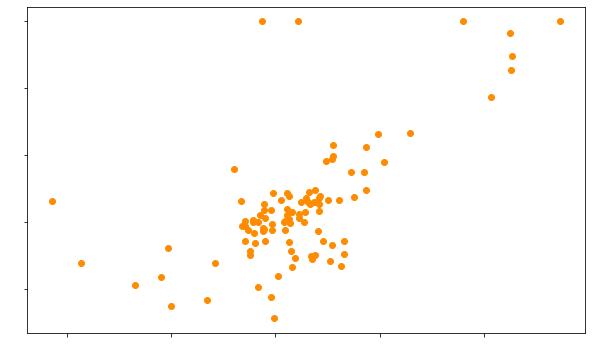

In [29]:
import matplotlib.pyplot as plt

boston_sample = boston_df[['RM','PRICE']]
boston_sample = boston_sample.sample(n=100,random_state=0)
print(boston_sample.shape)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
[t.set_color('white') for t in ax.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange');

In [35]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(random_state=0,max_depth=2)
dt_reg7 = DecisionTreeRegressor(random_state=0,max_depth=7)

# 테스트용 데이터셋: 4.5~8.5 사이 100개
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = boston_sample['RM'].values.reshape(-1,1)
y_target = boston_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
dt_reg2.fit(X_feature,y_target)
dt_reg7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

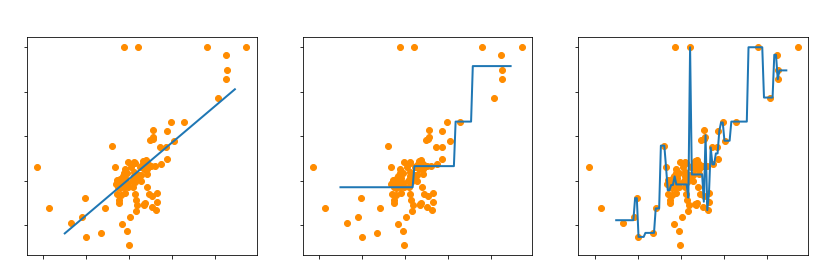

In [36]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)
### 다크모드라 축색을 흰색으로 함. 밑에 타이틀 색 역시 흰색으로 하겠음
for i in [ax1,ax2,ax3]:
    [t.set_color('white') for t in i.xaxis.get_ticklabels()]
    [t.set_color('white') for t in i.yaxis.get_ticklabels()]
    i.xaxis.label.set_color('white')
    i.yaxis.label.set_color('white')

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression',color='white')
ax1.scatter(boston_sample.RM, boston_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2',color='white')
ax2.scatter(boston_sample.RM, boston_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt2, label="max_depth:3", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7',color='white')
ax3.scatter(boston_sample.RM, boston_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)